#### Import modules

In [1]:
import G2script as G2
from GSASIIplot import PlotPatterns, PlotPowderLines
import matplotlib.pyplot as plt
import numpy as np

setting up GSASIIscriptable from /users/edgar1993a/work/g2home
GSAS-II binary directory: /users/edgar1993a/work/g2home/bindist
7 values read from config file /users/edgar1993a/work/g2home/config.py


#### Create project and save

In [2]:
PROJECT = 'lebail.gpx'
gpx_lebail = G2.G2Project(newgpx=PROJECT)
gpx_lebail.save()

gpx file saved as /home/edgar1993a/work/pyobjcryst/lebail.gpx


#### Add ZnO phase to the project

In [3]:
gpx_lebail.add_phase(phasefile='ZnO.cif', phasename='ZnO')

/home/edgar1993a/work/pyobjcryst/ZnO.cif read by Reader CIF
gpx file saved as /home/edgar1993a/work/pyobjcryst/lebail.gpx


#### Simulate powder diffraction pattern with the ZnO

Simulating 2500 points from 20 to 100 degrees 2theta
Instrument parameters read: /home/edgar1993a/work/pyobjcryst/cuka.instprm (G2 fmt) bank 1


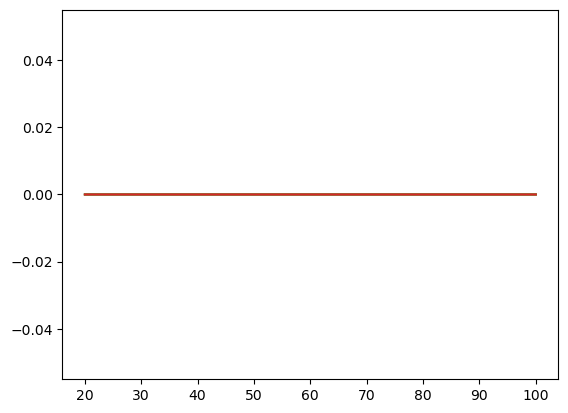

In [4]:
hist_zno = gpx_lebail.add_simulated_powder_histogram(
    histname='hzno',
    iparams='cuka.instprm',
    Tmin=20,
    Tmax=100,
    phases=[
        gpx_lebail.phase(phasename='ZnO'),
    ],
)
params0 = hist_zno.data['Sample Parameters']
data0 = hist_zno.data
hist_zno.plot()

#### Do the refinements

In [5]:
refinement_1 = {
    'set' : {
        'Limits' : [20,90],
        # 'Sample Parameters' : ['Scale'],
        # 'Background' : False,
    },
    # 'histograms' : [0],
    # 'phases' : gpx_lebail.Limitsphase(phasename='ZnO'),
}

In [6]:
refinements = [refinement_1]

In [7]:
gpx_lebail.do_refinements(
    refinements=refinements,
)

gpx file saved as /home/edgar1993a/work/pyobjcryst/lebail.gpx
 Hessian Levenberg-Marquardt SVD refinement on 1 variables:
initial chi^2 12523 with 2188 obs.
Read from file:/home/edgar1993a/work/pyobjcryst/lebail.bak0.gpx
Save to file  :/home/edgar1993a/work/pyobjcryst/lebail.gpx
GPX file save successful
 Refinement results are in file: /home/edgar1993a/work/pyobjcryst/lebail.lst
 ***** Refinement successful *****


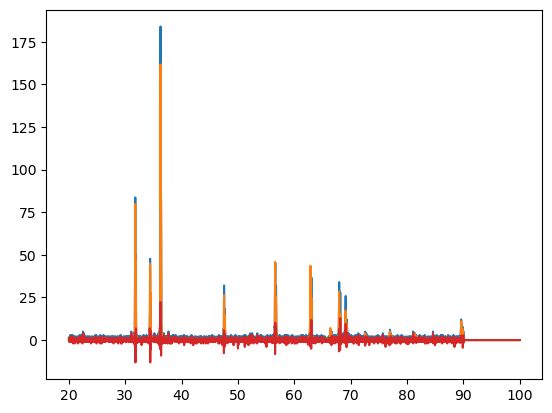

In [8]:
hist_zno.plot()

(30.0, 40.0)

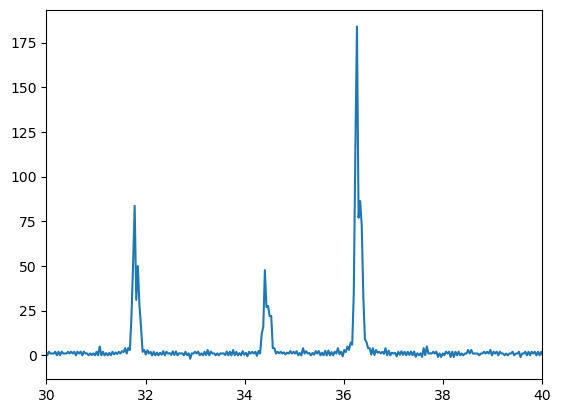

In [19]:
data = hist_zno.data['data'][1]
plt.plot(data[0], data[1])
plt.xlim([30,40])

In [23]:
ref_lebail = {
    'LeBail' : True,
    'histograms' : [0],
}
refinements = [ref_lebail]

In [24]:
gpx_lebail.do_refinements(refinements=refinements)

gpx file saved as /home/edgar1993a/work/pyobjcryst/lebail.gpx
 Hessian Levenberg-Marquardt SVD refinement on 1 variables:
initial chi^2 12523 with 2188 obs.
Read from file:/home/edgar1993a/work/pyobjcryst/lebail.bak0.gpx
Save to file  :/home/edgar1993a/work/pyobjcryst/lebail.gpx
GPX file save successful
 Refinement results are in file: /home/edgar1993a/work/pyobjcryst/lebail.lst
 ***** Refinement successful *****


(30.0, 40.0)

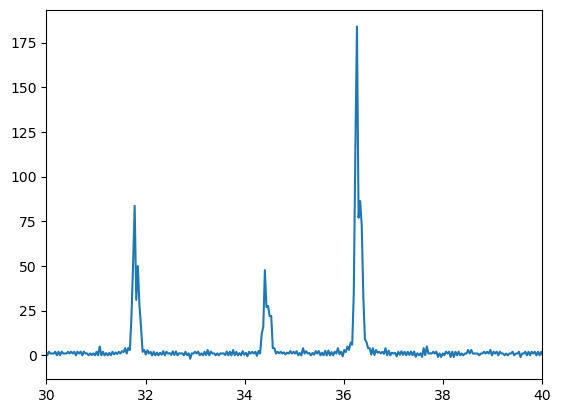

In [25]:
data = hist_zno.data['data'][1]
plt.plot(data[0], data[1])
plt.xlim([30,40])